# Laboratorium 2

```python
import pennylane as qml

n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 5

weight_shapes = {"weights": (n_layers, n_qubits)}
qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)
```

Podstawowe importy 

In [ ]:
import pennylane as qml
import pennylane.numpy as np

Podstawowy obiekt QNode: składa się z `device` i `funkcji kwantowej`.

Device - określa na jakiej maszynie będzie wykonywany kod - symulator lub prawdziwa maszyna. 
- `default.qubit`
- `lightning.qubit`

Funkcja kwantowa to pythonowa definicja obwodu. 


In [ ]:
dev = qml.device("default.qubit", wires=1)

In [ ]:
def quantum_function():
    return qml.state()

In [ ]:
circ = qml.QNode(quantum_function, dev)

In [ ]:
circ()

$$ \ket{\psi} = \ket{0} = [1,0]^T $$

In [ ]:
dev = qml.device("default.qubit", wires=1)

def quantum_function():
    return qml.state()

circ = qml.QNode(quantum_function, dev)

circ()

Bardziej pythonowe rozwiązanie

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def quantum_function():
    return qml.state()

quantum_function()

Możemy też zwrócić prawdopodobieństwa stanów bazowych

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def quantum_function():
    return qml.probs()

quantum_function()

Stan superpozycji 

In [ ]:
dev = qml.device("default.qubit", wires=1)

state = np.array([1/np.sqrt(2),1/np.sqrt(2)])

@qml.qnode(dev)
def superposiotion():
    qml.ops.StatePrep(state, wires=0)
    return qml.state()

superposiotion()

$$ \ket{\psi} = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) $$


In [ ]:
@qml.qnode(dev)
def superposiotion():
    qml.ops.StatePrep(state, wires=0)
    return qml.probs()

superposiotion()

# Bramki kwantowe


### Bramka X

Bramka X-gate reprezentowana jest przez macierz Pauli-X : 

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$


Bramka X obraca kubit w kierunku osi na sferze Bloch'a o $\pi$ radianów.
Zmienia $\ket{0}$ na $\ket{1}$ oraz $\ket{1}$ na $\ket{0}$.
Jest często nazywana kwantowym odpowiednikiem bramki NOT lub określana jako `bit-flip`.

$$ \sigma_x \ket{0} = \ket{1} \,\,\, \sigma_x\ket{1} = \ket{0} $$

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.X(wires=0)
    return qml.state()

qc()

In [ ]:
import matplotlib.pyplot as plt

qml.draw_mpl(qc)()

### Bramka Hadamarda 
Bramka Hadamarda przetwarza stan $|0\rangle$ na kombinacje liniowa (superpozycje) $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, co oznacza, że pomiar zwróci z takim samym prawdopodobieństwem stanu `1` lub `0`. 
Stan ten często oznaczany jest jako: $|+\rangle$. 

$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

$$ H\ket{0} = \frac{\sqrt{2}}{2} (\ket{0}+ \ket{1})$$
$$ H\ket{1} = \frac{\sqrt{2}}{2}(\ket{0}- \ket{1})$$

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc():
    qml.Hadamard(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

In [ ]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)


def qc():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.state()

qml.draw_mpl(qc)()
qc()

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc(state):
    if state==1:
        qml.X(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

qml.draw_mpl(qc)(0)
qc(0)

### RX

In [ ]:
@qml.qnode(dev)
def param_x_gate(theta):
    qml.RX(theta, wires=0)
    return qml.probs()

theta = np.pi

param_x_gate(theta)

### CNOT

Jedną z bramek realizującą zadania  na dwóch kubitach jest bramka CNOT, która na bazie bitu kontrolnego decyduje czy zastosować operację X do drugiego kubitu.

$$
\text{CNOT} = \begin{bmatrix} 1 \,\, \,\,\, 0 \,\,\,\,\, 0 \,\,\,\,\, 0 \\ 
0\,\, \,\,\, 1 \,\,\,\,\, 0 \,\,\,\,\, 0 \\
0\,\,\,\,\, 0\,\,\,\,\,  0 \,\,\,\,\, 1 \\ 0\,\,\,\,\, 0\,\,\,\,\, 1\,\,\,\,\, 0 \end{bmatrix}
$$

$$ \text{CNOT} \ket{00} = \ket{00} $$

$$ \text{CNOT} \ket{10} = \ket{11} $$

In [ ]:
import pennylane as qml
import pennylane.numpy as np

dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circ(stan='0'):
    if stan == '1':
        qml.X(wires=0)
    qml.CNOT(wires=[0,1])
    # qml.CNOT(wires=[1,0])
    return qml.state()


state = circ()
print(state)

In [ ]:
state = circ('1')
print(state)

In [ ]:
qml.draw_mpl(circ)()

In [ ]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    # qml.Hadamard(wires=0)
    qml.X(wires=0)
    qml.CNOT(wires=[0,1])
    #return qml.state()
    return qml.counts()

qc()

In [ ]:
import matplotlib.pyplot as plt
qml.drawer.use_style("sketch")
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [ ]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.X(wires=1)
    #return qml.state()
    return qml.counts()

qc()

In [ ]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [ ]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.X(wires=1)
    qml.Z(wires=1)
    #return qml.state()
    return qml.counts()

qc()

In [ ]:
dev = qml.device('default.qubit', wires=3, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    #return qml.state()
    return qml.counts()

qc()

## Zadanie -  Obwód kwantowy z optymalizacją

- Napisz nowy obwód kwantowy, który zawierać będzie tylko bramkę $R_X$ dla dowolnego parametru $\theta$
- oblicz i uzasadnij, że wartość oczekiwana dla stanu $\ket{\psi} = R_X \, \ket{0}$ 
$$<Z> = cos^2(\theta /2)- sin^2(\theta /2) = cos(\theta)$$


Załóżmy, że nasz problem obliczeniowy sprowadza się do wygenerowania wartości oczekiwanej o wartości 0.5. 

$$
 \textbf{<Z>} = \bra{\psi} \textbf{Z} \ket{\psi} = 0.5
 $$

 

Napisz program znajdujący rozwiązanie - szukający wagę $\theta$ dla naszego obwodu

- Zdefiniuj funkcję kosztu, którą bedziemy minimalizować $(Y - y)^2$
- zainicjuj rozwiązanie $theta=0.01$ i przypisz do tablicy array `np.array(0.01, requires_grad=True)`
- Jako opt wybierz spadek po gradiencie : `opt = qml.GradientDescentOptimizer(stepsize=0.1)`
- uzyj poniższego kodu do wygenerowania pętli obiczeń 

```python

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")
```

In [ ]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def par_c(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))


def cost_fn(theta):
    return (par_c(theta) - 0.5)**2

theta = np.array(0.01, requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")

print(f"Optymalizacja zakonczona dla theta={theta}, koszt: {cost_fn(theta)}")

In [ ]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev, interface="torch")
def par_c(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))



def cost_fn(theta):
    target = 0.5
    return (par_c(theta) - target) ** 2


import torch
from torch.optim import Adam 

theta = torch.tensor(0.01, requires_grad=True)

optimizer = Adam([theta], lr=0.1)
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = cost_fn(theta)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")

Jeszcze jeden przykład

- Napisz obwód kwantowy, który zawierać będzie bramkę $R_X$ dla parametru $\theta_1$ oraz $R_Y$ dla parametru $\theta_2$
- oblicz i uzasadnij, że wartość oczekiwana dla stanu $\ket{\psi} = R_Y(\theta_2) R_X(\theta_1) \, \ket{0}$ 

$$<Z>  = \cos(\theta_1) \cos(\theta_2)$$

Mozliwe wartości średniej zawierają się w przedziale $-1$, $1$.

Przyjmij załozenie, ze optymalne rozwiązanie realizowane jest dla wartości oczekiwanej = 0.4 

In [ ]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def par_c(theta):
    qml.RX(theta[0], wires=0)
    qml.RY(theta[1], wires=0)
    return qml.expval(qml.PauliZ(0))


def cost_fn(theta):
    return (par_c(theta) - 0.4)**2

theta = np.array([0.01, 0.02], requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")

print(f"Optymalizacja zakonczona dla theta={theta}, koszt: {cost_fn(theta)}")

### Zadanie

Celem jest znalezienie najmnieszej wartości własnej dla Hamiltonianu $H = Z_0 Z_1 + Z_0$

Tego typu hamiltoniany opisują układy fizyczne np. systemy spinowe. 

$Z_0 Z_1$ - mozna interpretować jako krawedz miedzy dwoma wierzchołkami. 

$Z_0$ - efekty lokalne wierzchołka 0

In [ ]:
import pennylane as qml
from pennylane import numpy as np 
import random

dev = qml.device("default.qubit", wires=2)

H = qml.PauliZ(0) @ qml.PauliZ(1) + qml.PauliZ(0)

@qml.qnode(dev)
def circuit(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0,1])
    return qml.expval(H)

def cost_fn(params):
    return circuit(params)

init_param = [random.uniform(0, 2*3.1415) for _ in range(2)]

params = np.array(init_param, requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.01)

epochs = 500
for epoch in range(epochs):
    params = opt.step(cost_fn, params)

    if epoch % 50 == 0:
        print(f"epoka: {epoch}, theta: {params}, koszt: {cost_fn(params)}")

print(f"Optymalizacja zakonczona dla theta={params}, koszt: {cost_fn(params)}")

## klasyczne dane


In [ ]:
import pennylane as qml
import pennylane.numpy as np


N = 3
wires = range(N)
dev = qml.device('default.qubit', wires)

In [ ]:
@qml.qnode(dev)
def basis_encoding(features):
    qml.BasisEmbedding(features, wires)
    return qml.probs()

$$ \ket{111} = \ket{1}\otimes \ket{1} \otimes \ket{1} = [0 0 0 0 0 0 0 1]^T$$


In [ ]:
basis_encoding([1,1,1])

In [ ]:
basis_encoding(7)

In [ ]:
qml.draw_mpl(basis_encoding)([1,1,1])

In [ ]:
n_wires = 4 
dev = qml.device('default.qubit', wires= n_wires)

@qml.qnode(dev)
def circ(features):
    for i in range(len(features)):
        if features[i] == 1:
            qml.X(i)
    qml.Barrier()
    qml.Hadamard(1)
    qml.CNOT([1,3])
    return qml.state()

In [ ]:
circ([1,0,1,0])

In [ ]:
qml.draw_mpl(circ, level='device', scale=0.7)([1,0,1,0])

## Amplitude encoding

In [ ]:
import pennylane as qml
N = 3
wires = range(N)

dev = qml.device("default.qubit", wires)

@qml.qnode(dev)
def circuit(features):
    qml.AmplitudeEmbedding(features, wires)
    return qml.state()

In [ ]:
circuit([0.625,0.0,0.0,0.0,0.625,0.375,0.25,0.125])

In [ ]:
import pennylane as qml
N = 3
wires = range(N)

dev = qml.device("default.qubit", wires)

@qml.qnode(dev)
def circuit(f=None):
    qml.AmplitudeEmbedding(features=f, wires=dev.wires, normalize=True, pad_with=0)
    return qml.expval(qml.PauliZ(0)), qml.state()

In [ ]:
vect = [0.1, -0.3, 0.5, 0.4, 0.2]

In [ ]:
norm = np.linalg.norm(vect)
norm_vec = np.round([i / norm for i in vect], 4)
print(f"Vec: {vect}, Norm{norm_vec}")

In [ ]:
res, state = circuit(f=norm_vec)
res2, state2 = circuit(f=vect)

In [ ]:
state.real, state2.real

In [ ]:
qml.draw_mpl(circuit)(norm_vec)

In [12]:
import pennylane as qml
import pennylane.numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import load_wine

data = load_wine()

X = data.data
y = data.target

In [13]:
def prepare_ampl(x, target_len = 16):
    padded = np.pad(x, (0, target_len - len(x)), mode="constant")
    normed = padded / np.linalg.norm(padded)
    return np.array(normed, requires_grad=True)

In [14]:
x0 = X[0]
features = prepare_ampl(x0)

In [15]:
features

tensor([1.32644724e-02, 1.59397384e-03, 2.26512072e-03, 1.45415157e-02,
        1.18382852e-01, 2.61001565e-03, 2.85237424e-03, 2.61001565e-04,
        2.13461994e-03, 5.25731723e-03, 9.69434383e-04, 3.65402190e-03,
        9.92738094e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], requires_grad=True)

In [16]:
n_qubits = 4
dev = qml.device('default.qubit', wires = n_qubits)

@qml.qnode(dev)
def amplitude_circ(x):
    qml.AmplitudeEmbedding(features=x, wires=range(n_qubits), normalize=False)
    return qml.state()

In [17]:
state = amplitude_circ(features)


In [18]:
state

tensor([1.32644724e-02+0.j, 1.59397384e-03+0.j, 2.26512072e-03+0.j,
        1.45415157e-02+0.j, 1.18382852e-01+0.j, 2.61001565e-03+0.j,
        2.85237424e-03+0.j, 2.61001565e-04+0.j, 2.13461994e-03+0.j,
        5.25731723e-03+0.j, 9.69434383e-04+0.j, 3.65402190e-03+0.j,
        9.92738094e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j], requires_grad=True)

In [19]:
@qml.qnode(dev)
def amp_circ(x):
    qml.AmplitudeEmbedding(features=x, wires=range(n_qubits), normalize=True, pad_with=0)
    return qml.state()

In [20]:
state2 = amp_circ(X[0])

In [21]:
state2

array([1.32644724e-02+0.j, 1.59397384e-03+0.j, 2.26512072e-03+0.j,
       1.45415157e-02+0.j, 1.18382852e-01+0.j, 2.61001565e-03+0.j,
       2.85237424e-03+0.j, 2.61001565e-04+0.j, 2.13461994e-03+0.j,
       5.25731723e-03+0.j, 9.69434383e-04+0.j, 3.65402190e-03+0.j,
       9.92738094e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j])

## Angle encoding

$$ x \to R_k(x) \ket{0} = e^{-i\,x \frac{\sigma_k}{2}} \ket{0} $$

In [22]:
import pennylane as qml
import pennylane.numpy as np

features= [np.pi/3, np.pi/4]
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circ(features):
    qml.AngleEmbedding(features=features, rotation='Y', wires=range(2))
    return qml.probs(wires=[0,1])

In [23]:
np.round(circ(features), 3)

tensor([0.64 , 0.11 , 0.213, 0.037], requires_grad=True)

(<Figure size 400x300 with 1 Axes>, <Axes: >)

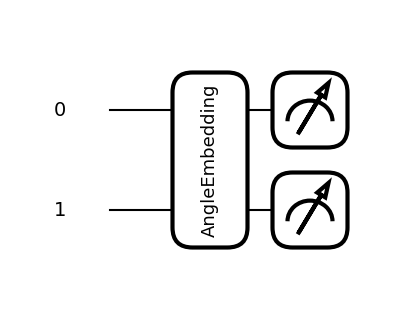

In [24]:
qml.draw_mpl(circ)(features)

In [25]:
import pennylane as qml
import pennylane.numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import load_wine

data = load_wine()

X = data.data
y = data.target

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, np.pi))
X_saled = scaler.fit_transform(X)

In [27]:
dev = qml.device('default.qubit', wires=13)

@qml.qnode(dev)
def emb(x):
    qml.AngleEmbedding(x, wires=range(len(x)), rotation='Y')
    return qml.expval(qml.PauliZ(0))

In [28]:
emb(X_saled[0])

np.float64(-0.8794737512064895)

In [29]:
@qml.qnode(dev)
def emb(x):
    qml.AngleEmbedding(x, wires=range(len(x)), rotation='Y')
    return [qml.expval(qml.PauliZ(i)) for i in range(len(x))]

In [30]:
emb(X_saled[0])

[np.float64(-0.8794737512064895),
 np.float64(0.8240675736145868),
 np.float64(-0.2248601123708277),
 np.float64(0.6897237772781044),
 np.float64(-0.3668542188130566),
 np.float64(-0.39017706326055457),
 np.float64(-0.2298992328822939),
 np.float64(0.6300878435817112),
 np.float64(-0.28820944852718955),
 np.float64(0.3913341989876884),
 np.float64(0.14001614496862924),
 np.float64(-0.9957653484788057),
 np.float64(-0.1915177132878786)]